In [1]:
import numpy as np
from matplotlib import pyplot as plt

from gencol import genetic_column_generation

The cost function for the Helium atom is
$$ C(r_1, r_2) = \frac{1}{|r_1 - r_2|} - \frac{2}{|r_1|} - \frac{2}{|r_2|} $$

We take the marginal constrains
$$ \lambda(x) = -\frac{e^{x^2}}{\sqrt{\pi}} $$

In [2]:
marginals_N = 2
grid_size = 35
beta = 3            # hyperparameter for controlling the maximum columns
maxiters = 1000      # maximum number of iterations
maxsamples = 50_000    # maximum number of samples for mutation

# grid_points = np.arange(1, grid_size+1)
grid_points = np.linspace(0, 1, grid_size)

def pair_potential(w1, w2, eps=1e-5):
    return 1/(np.abs(w1 - w2) + eps) - 2/(np.abs(w1) + eps) - 2/(np.abs(w2) + eps)

marginal = np.exp(- grid_points**2) / np.sqrt(np.pi)
marginal /= marginal.sum()

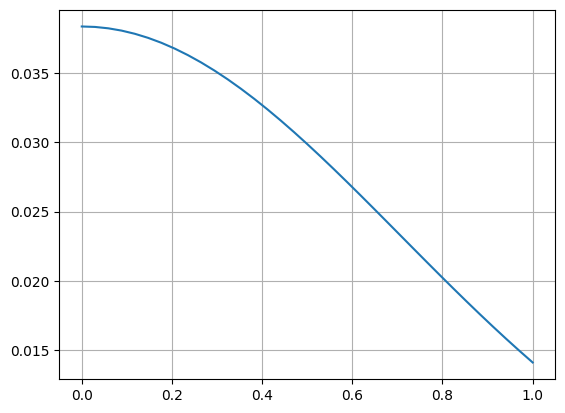

In [3]:
plt.plot(grid_points, marginal)
plt.grid()

In [4]:
AI, alphaI, cost_history, dual_value_history = genetic_column_generation(
    N=marginals_N,
    l=grid_size,
    beta=beta,
    pair_potential=pair_potential,
    coordinates_of_sites=[0, 1],
    marginal=marginal,
    maxiter=maxiters,
    maxsamples=maxsamples,
)

Initialized A_I


  0%|          | 0/1000 [00:00<?, ?it/s, cost=7.98e+4, samples=14]

100%|██████████| 1000/1000 [00:10<00:00, 94.76it/s, cost=7.98e+4, samples=14]


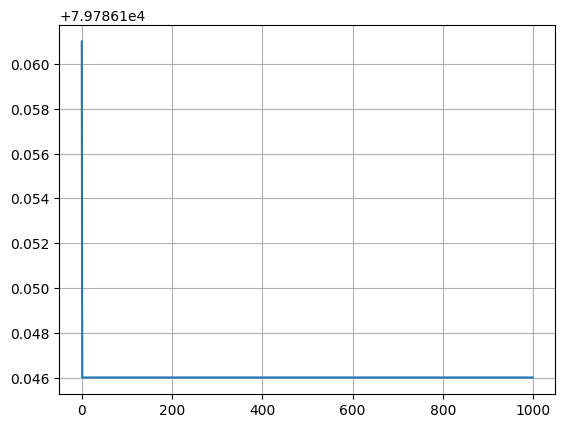

In [5]:
plt.plot(cost_history)
plt.grid()

AI.shape=(35, 94)
alphaI.shape=(94,)


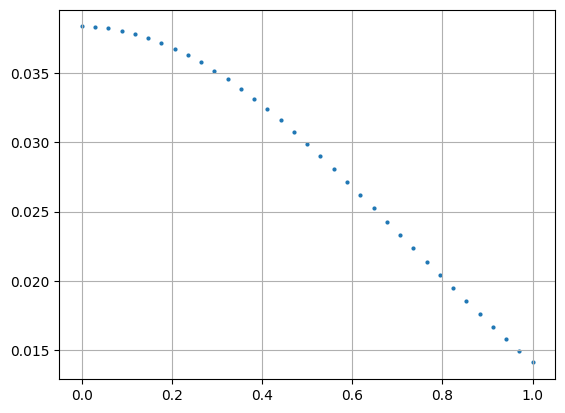

In [6]:
print(f"{AI.shape=}")
print(f"{alphaI.shape=}")

gamma = AI @ alphaI

plt.scatter(grid_points, gamma, s=4)
plt.grid()

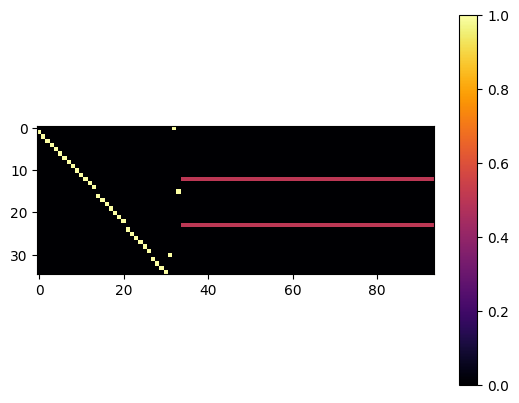

In [7]:
plt.imshow(AI, cmap='inferno')
plt.colorbar()

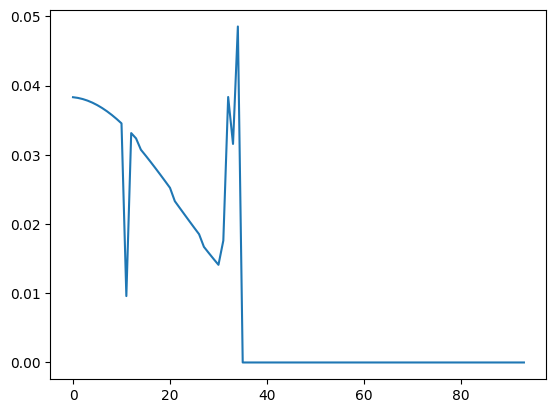

In [8]:
plt.plot(alphaI)

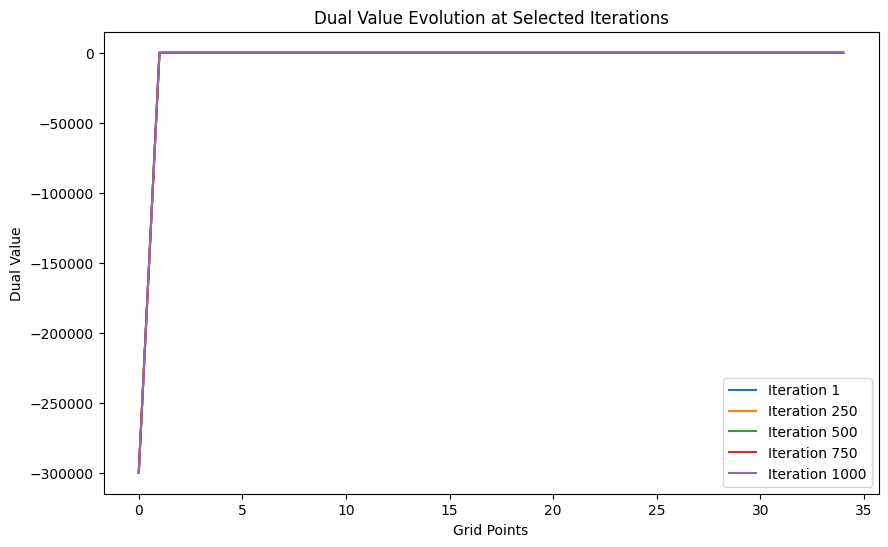

In [9]:
total_iterations = dual_value_history.shape[0]
indices_to_plot = np.linspace(0, total_iterations - 1, 5, dtype=int)  # Picks 5 indices equally spaced

# Plotting
plt.figure(figsize=(10, 6))
for idx in indices_to_plot:
    plt.plot(dual_value_history[idx], label=f'Iteration {idx+1}')  # Adjust indexing if needed

plt.title('Dual Value Evolution at Selected Iterations')
plt.xlabel('Grid Points')
plt.ylabel('Dual Value')
plt.legend()
plt.show()